# Conjuntos de Julia y Mandelbrot 3D

Los conjuntos de fractales de Julia y de Mandelbrot poseen representaciones tridimensionales que son reflejo de una dimensión adicional  4D. Es como cuando en 3D hacemos un corte en 2D y obtenemos un plano.

A continuación se presenta un ejemplo de algoritmo que permite generar una imagen 3D de estos conjuntos.

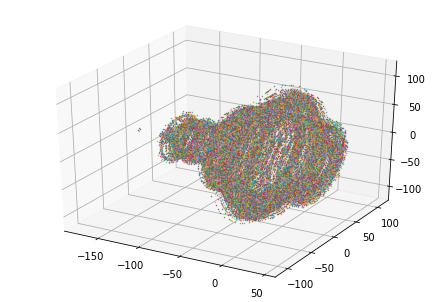

In [4]:
# <!-- collapse=True -->
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig=plt.figure()
# agregar un tercer eje para la tercera coordenada
ax = Axes3D(fig)

p =[]

#constant value for 4th dimension
cw =0.0

# constant 4-vector for julia set
cr=-0.2
ci=-0.0
cj=-0.2
ck=0.7

#higher numbers focus in on smaller section
zoom = 1

#used to shift along x,y, and z axes respectively
a = 0.0
b = 0.0
c = 0.0
#maximum number of iterations for fractal
maxIter = 30

#minimum number of iterations needed to plot point
pointMin = 14


#julia fractal if 0, mandelbrot set if 1
mandel = 1

#loop through each point to be examined
for k in range(-200,200,2):
    for j in range(-200,200,2):
        for i in range(-200,200,2):
			#if statement can be used to draw only distinct planes of the set
            if 1:
				
				#initialize starting values for the iteration at that point
                w = cw
                x =a + i/(100.0 * zoom)
                y =b + j/(100.0 * zoom)
                z =c + k/(100.0 * zoom)
		
				#alternative for mandelbrot set
                if mandel == 1:
                    cr = x
                    ci = y
                    cj = z
                    ck = w
				
                iter = 0
			
				#distance of iteration from origin
                dist = 0
				
				#using quaternion multiplication, apply the iteration z(n+1) = z*z + c
				#to the point until it either escapes the bounds or has run through enough iterations
                while dist < 4 and iter < maxIter:
                    tem = x+x
                    x = x*x-y*y-z*z-w*w+cr
                    y = tem*y + ci
                    z = tem*z + cj
                    w = tem*w + ck
    
                    iter += 1
                    dist = x*x +y*y + z*z + w*w

                #if the point lasted an acceptable number of iterations, draw it
				#the color fo the dot reflects what iteration the point made it to before it escaped
                if iter >= pointMin  and iter <=maxIter-1:
                    #Color = color.hsv_to_rgb((iter/maxIter-.1,1,1))
                    ax.scatter(i,j,k,s=0.2)
                    #p=points(pos=(i,j,k),color=Color,shape='square',size=1)
